In [1]:
#import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
#import dataset
#we get 4 np arrays
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#explore data
print(f"""
{train_images.shape},
{train_labels.size},
{train_images[0].shape},
{train_images[0].size},
{np.unique(train_labels)}
{type(train_images)}
{train_images.dtype}
""")


(60000, 28, 28),
60000,
(28, 28),
784,
[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
uint8



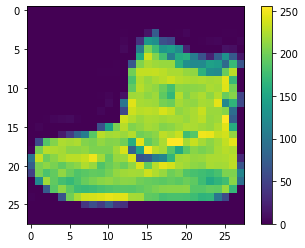

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [0]:
#scale/normalize data
#pixel values are between 0 and 255 so we divide the values by 255
train_images=train_images/255.0
test_images=test_images/255.0

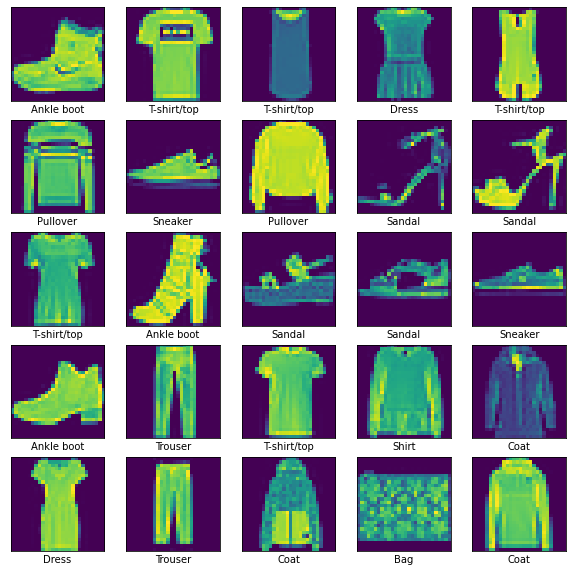

In [7]:
#display first 25 imgs from the training set to verify tha data is in the correct format
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#build the model
# 1. configure the layers
# 2. compile the model

"""
model with 2 Dense layers
first layer with 128 nodes
second/last layer returns logits array with length of 10 (basically an array 
of probabilities - what's the probability of each img belonging to one 
of the categories). Each node contains a score that indicates
if the current image belongs to one of the 10 categories
"""
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10)

])

In [0]:
#compiling the model
#loss fucntion - we want to minimize it
#optimizer - how the model is updated based on the data and loss function
#metrics - to monitor the training and testng (we use accuracy - what fraction of the imgs are classified correclty)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
#train the model
"""
1. feed the traing data into the model
2. model learns
3. make predictions about the test data
4. verify the predictions (see if predicted labels match the test labels)
"""

'\n1. feed the traing data into the model\n2. model learns\n3. make predictions about the test data\n4. verify the predictions (see if predicted labels match the test labels)\n'

In [11]:
# 1. Feed the model (fit the model to the data)

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4983 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3748 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3112 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2947 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2810 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2575 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2461 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [0]:
# model.fit(train_images, train_labels, batch_size=1, epochs=100)

In [14]:
# evaluate the model on thest data
#accuracy of thest on the model data lower - overfitting, the model learned the data too well
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 0s - loss: 0.3229 - accuracy: 0.8862

Test accuracy: 0.8862000107765198


In [0]:
"""#making predictions
the models' output are logits, we attach Softmax function to 
them to see them as probabilities"""
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [17]:
predictions[0]
"""we get an array of 10 numbers, each representing the class and the model's
confidence that the img belongs to the class"""

array([1.2130927e-10, 1.9279339e-14, 7.3236825e-12, 2.4149779e-13,
       3.0737614e-11, 1.6438916e-04, 3.1237998e-10, 3.0881579e-03,
       8.6894369e-10, 9.9674749e-01], dtype=float32)

9
Ankle boot
<class 'numpy.ndarray'>


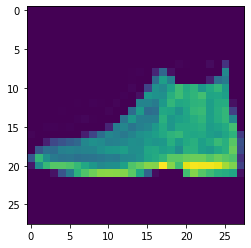

In [23]:
print(np.argmax(predictions[0]))
print(class_names[9])
print(type(predictions))
plt.imshow(test_images[0])

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                      color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

<function matplotlib.pyplot.show>

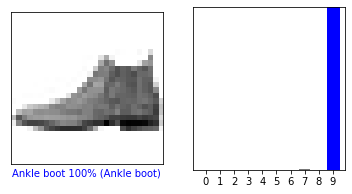

In [39]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show

<function matplotlib.pyplot.show>

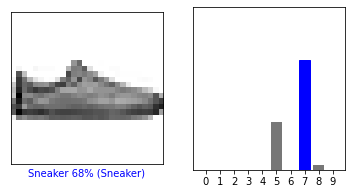

In [40]:
i = 12m
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show

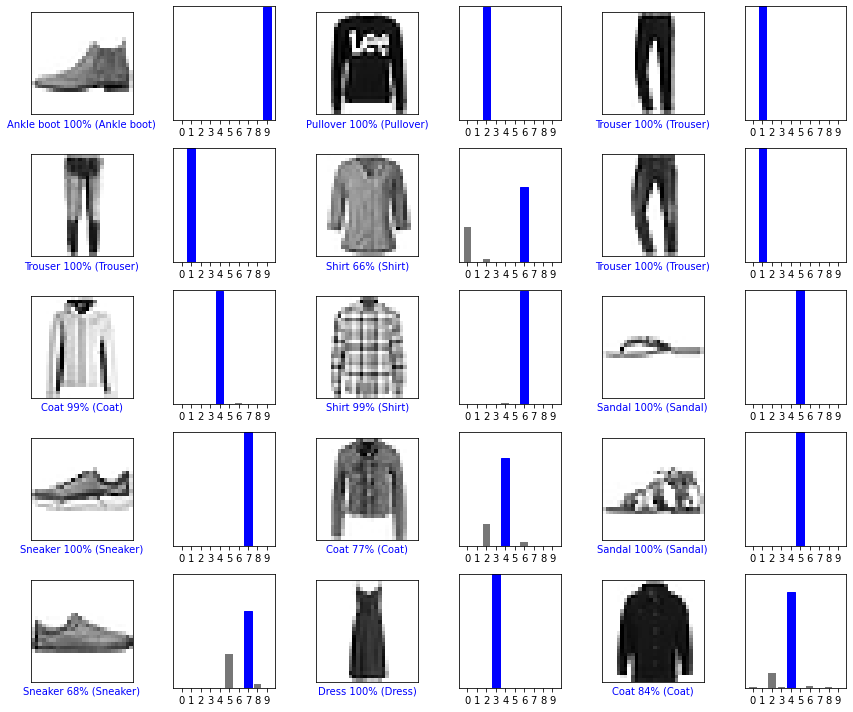

In [41]:
"""
plot some images
plot test imgs, predicted labels and true labels
correct preds = blue
incorrect preds = red
"""

num_rows = 5
num_cols = 3
num_images = num_rows  * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [52]:
"""
using the trained model
"""

img = test_images[1]
print(img.shape)

#we need to add this img to a batch for keras

img = np.expand_dims(img, 0)
print(img.shape)

#predict the label for the img

predictions_single = probability_model.predict(img)
print(predictions_single)
print(np.argmax(predictions_single[0]))
print(type(predictions_single))
print(predictions_single[0])

(28, 28)
(1, 28, 28)
[[4.03524056e-04 7.11224873e-16 9.98898387e-01 2.17577543e-13
  5.88512630e-04 8.10658051e-12 1.09520501e-04 1.86805321e-16
  2.66533887e-12 1.08501295e-13]]
2
<class 'numpy.ndarray'>
[4.03524056e-04 7.11224873e-16 9.98898387e-01 2.17577543e-13
 5.88512630e-04 8.10658051e-12 1.09520501e-04 1.86805321e-16
 2.66533887e-12 1.08501295e-13]


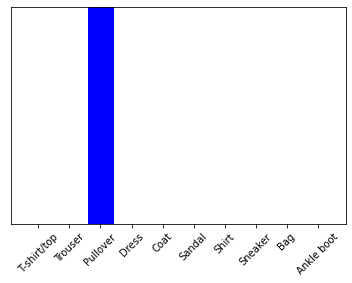

In [49]:
#plot the prediction
plot_value_array(1, predictions_single[0], test_labels)
_=plt.xticks(range(10), class_names, rotation=45)